In [ ]:
#pip install import_ipynb

In [ ]:
import import_ipynb
import Distance_Matrix

In [3]:
#Libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import random

#StateTree


**State trees** are a graphical representation of possible states of a system or process and the transitions between them. In a state tree, each vertex represents a specific state, and the edges connecting the vertices represent possible transitions between states.

###DFS

**The DFS method** involves examining the graph by traversing the vertices along one branch until it reaches the end, and then returning and continuing to explore subsequent branches. While the algorithm is running, all vertices of the graph and all edges are visited.

**DFS method implementation:**


In [4]:
def DFS(distance_matrix):
    n = len(distance_matrix)
    roads_start = []
    roads = []

    for road in range(n - 1):
        roads_start.append(([0, road + 1], distance_matrix[0][road + 1]))
        if roads_start[road][1] != -1:
            roads.append(roads_start[road])

    best_road = None
    min_route = float('inf')

    while roads:
        road, route = roads.pop()

        while len(road) < n:  # Condition to visit all cities
            for i in range(n):
                if i not in road:
                    new_road = road + [i]
                    if distance_matrix[new_road[-2]][new_road[-1]] != -1:
                        new_route = route + distance_matrix[new_road[-2]][new_road[-1]]
                        roads.append((new_road, new_route))

            if roads:
                road, route = roads.pop()
            else:
                break

        if len(road) == n:
            road.append(0)
            if distance_matrix[road[-2]][road[-1]] != -1:
                new_route = route + distance_matrix[road[-2]][road[-1]]
            else:
                new_route = float('inf')

            if new_route < min_route:
                min_route = new_route
                best_road = road

    return (best_road, min_route)

###BFS

**The BFS method** is a graph search algorithm that starts at a given vertex and checks all its immediate neighbors, then moves to the adjacent vertices of those neighbors. Unlike the longitudinal method, which explores the graph along one branch, the breadth-first method explores level by level, starting from the nearest vertices.

**Implementation of the BFS method:**

In [5]:
def BFS(distance_matrix):
    n = len(distance_matrix)
    roads_start = []
    roads = []

    for road in range(n - 1):
        roads_start.append(([0, road + 1], distance_matrix[0][road + 1]))
        if roads_start[road][1] != -1:
            roads.append(roads_start[road])

    best_road = None
    min_route = float('inf')

    while roads:
        road, route = roads.pop(0)

        if len(road) == n:  # Condition to visit all cities
            road.append(0)

            if distance_matrix[road[-2]][road[-1]] != -1:
                new_route = route + distance_matrix[road[-2]][road[-1]]
            else:
                new_route = float('inf')

            if new_route < min_route:
                min_route = new_route
                best_road = road

        else:  # Creating possible routes
            for i in range(n):
                if i not in road:
                    new_road = road + [i]
                    if distance_matrix[new_road[-2]][new_road[-1]] != -1:
                        new_route = route + distance_matrix[new_road[-2]][new_road[-1]]
                        roads.append((new_road, new_route))

    return (best_road, min_route)

##Comparison with time


In [6]:
random.seed(254468)

times_DFS = []
times_BFS = []

for i in range(4, 11):
    print(f"Results for {i} cities:")
    points = Distance_Matrix.coordinates(i)
    distance_matrix = Distance_Matrix.generate_distance_matrix(points)

    start = time.time()
    print("DFS:", DFS(distance_matrix))
    end = time.time()
    times_DFS.append(end - start)
    sum_time_DFS = sum(times_DFS)

    start = time.time()
    print("BFS:", BFS(distance_matrix))
    end = time.time()
    times_BFS.append(end - start)
    sum_time_BFS = sum(times_BFS)

    print("")

Results for 4 cities:
DFS: ([0, 2, 3, 1, 0], 427.9051474450652)
BFS: ([0, 2, 3, 1, 0], 427.9051474450652)

Results for 5 cities:
DFS: ([0, 1, 4, 2, 3, 0], 405.1440613871821)
BFS: ([0, 1, 4, 2, 3, 0], 405.1440613871821)

Results for 6 cities:
DFS: ([0, 3, 4, 1, 5, 2, 0], 439.86397331845865)
BFS: ([0, 3, 4, 1, 5, 2, 0], 439.86397331845865)

Results for 7 cities:
DFS: ([0, 1, 2, 6, 3, 4, 5, 0], 545.5094631325261)
BFS: ([0, 1, 2, 6, 3, 4, 5, 0], 545.5094631325261)

Results for 8 cities:
DFS: ([0, 2, 5, 1, 7, 4, 3, 6, 0], 454.93514594091636)
BFS: ([0, 2, 5, 1, 7, 4, 3, 6, 0], 454.93514594091636)

Results for 9 cities:
DFS: ([0, 4, 5, 7, 2, 6, 1, 8, 3, 0], 724.8514252293619)
BFS: ([0, 4, 5, 7, 2, 6, 1, 8, 3, 0], 724.8514252293619)

Results for 10 cities:
DFS: ([0, 4, 3, 2, 7, 5, 8, 1, 9, 6, 0], 858.208429478818)
BFS: ([0, 4, 3, 2, 7, 5, 8, 1, 9, 6, 0], 858.208429478818)



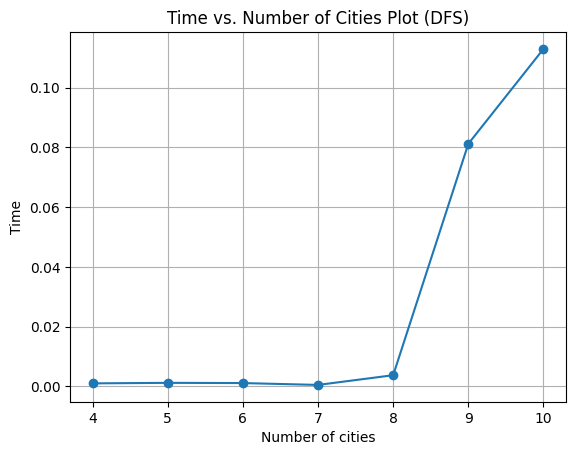

In [7]:
i_values = range(4, 11)

plt.plot(i_values, times_DFS, marker='o', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Time vs. Number of Cities Plot (DFS)')

plt.grid(True)

plt.show()

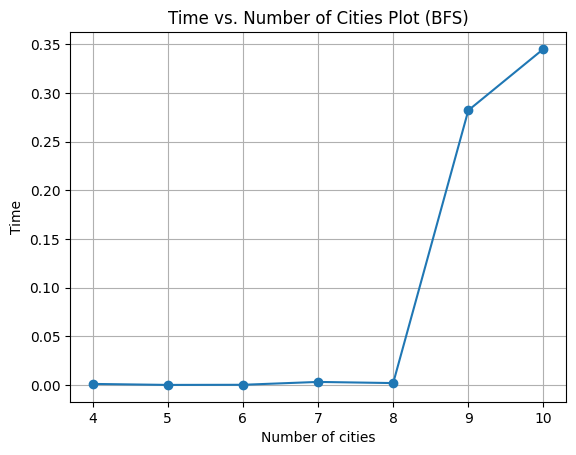

In [8]:
i_values = range(4, 11)

plt.plot(i_values, times_BFS, marker='o', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Time vs. Number of Cities Plot (BFS)')

plt.grid(True)

plt.show()

As you can see, the **BFS method** is much more computationally complex, which is indicated by the time in which the algorithm coped with a larger number of cities to travel through. We can therefore conclude that the **DFS method** is much more optimal in terms of computing power.